In [132]:
%matplotlib inline
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)

df_ride = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df_pyber = pd.merge(df_city, df_ride, how="inner", on="city")
                    

# Display the data table for preview
df_pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [133]:

# Obtain the x and y coordinates for each of the three city types

#### for getting No. of rides per city
grp_pyber_type = df_pyber.groupby(by="city")
rides_per_city = grp_pyber_type["ride_id"].count()

#### Average Fare per city
avg_fare_per_city = grp_pyber_type["fare"].mean()

#### Adding city type
type_per_city = grp_pyber_type["type"].max()
city_color = []

#### assigning color for each city type
for type in type_per_city:
    if (type=="Urban"):
        color_type = "lightcoral"
    elif (type=="Suburban"):
        color_type = "lightskyblue"
    else:
        color_type = "gold"   
    city_color.append(color_type)


#### Adding list(column) per area (for area = rides * fare)
#### This calculation is used to populate the bubble area
area_per_city = rides_per_city * avg_fare_per_city

## Bubble Plot of Ride Sharing Data

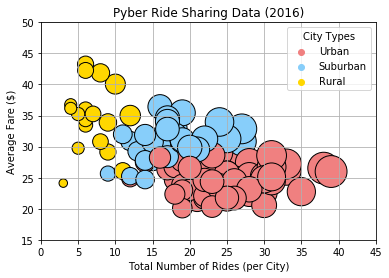

In [136]:

# Build the scatter plots for each city types
plt.scatter(rides_per_city, avg_fare_per_city, area_per_city, c=city_color, marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lg_urban = plt.scatter(1,1, marker="o", color="lightcoral" )
lg_suburban = plt.scatter(1,1, marker="o", color="lightskyblue" )
lg_rural = plt.scatter(1,1, marker="o", color="gold" )

plt.grid()
plt.legend( (lg_urban, lg_suburban, lg_rural), ("Urban", "Suburban", "Rural"), title="City Types" )

plt.xlim(0, 45, 5)
plt.ylim(15, 50, 5)


# Save Figure
plt.savefig("./Images/pyber_bubble.png")

In [115]:
# Show plot
plt.show()

## Total Fares by City Type

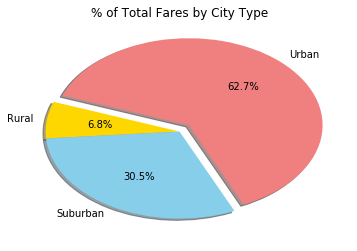

In [130]:
# Calculate Type Percents

grp_city_type = df_pyber.groupby(by="type")

city_types = df_pyber.sort_values("type")["type"].unique()

total_entries = len(df_pyber)

city_type_fare_sum = grp_city_type["fare"].sum()
total_sum = df_pyber.sum()

city_type_percentage = (city_type_fare_sum/total_entries) * 100

colors = ["gold", "skyblue", "lightcoral"]

explode = (0, 0, 0.1)

# Build Pie Chart
plt.pie(city_type_percentage, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)
 

# Build Pie Chart
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("./Images/pyber_citytype_fare.png")

In [117]:
# Show Figure
plt.show()

## Total Rides by City Type

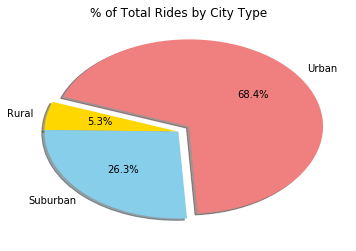

In [129]:
# Calculate Ride Percents

grp_city_type = df_pyber.groupby(by="type")

city_types = df_pyber.sort_values("type")["type"].unique()

total_entries = len(df_pyber)

city_type_count = grp_city_type["type"].count()

city_type_percentage = (city_type_count/total_entries) * 100

colors = ["gold", "skyblue", "lightcoral"]

explode = (0, 0, 0.1)

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(city_type_percentage, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Save Figure
plt.savefig("./Images/pyber_citytype_totalrides.png")

In [119]:
# Show Figure
plt.show()

## Total Drivers by City Type

2973


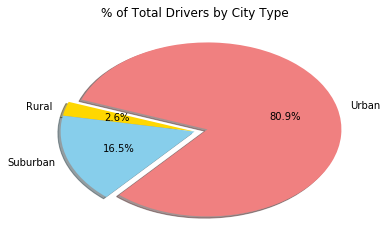

In [128]:
# Calculate Driver Percents


grp_city_type = df_city.groupby(by="type")

city_type_count = grp_city_type["driver_count"].sum()

totat_driver_count = df_city["driver_count"].sum()
print(totat_driver_count)

city_type_percentage = (city_type_count/totat_driver_count) * 100

colors = ["gold", "skyblue", "lightcoral"]

explode = (0, 0, 0.1)

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(city_type_percentage, explode=explode, labels=city_types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=160)

# Build Pie Charts

# Save Figure
plt.savefig("./Images/pyber_citytype_totaldrivers.png")

In [121]:
# Show Figure
plt.show()